In [1]:
# importing importent libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as dm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

C:\Users\int10106\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Uploading APR data
df = pd.read_excel('C:/Users/int10106/Desktop/Ajio data/River Library Model/Sep23_Aug24_APR.xlsx', header = 0)
df.head()

,Month,Con,Date,BPID,Name,Batch No,Logged on Time,Talk Time,Hold Time,Wrap Time,...,Surveys Sent,Surveys Received,Promoters,Passives,Detractors,TNPS%,Tagging Count,Transfer By Agent,IB: Handled Calls,OB: Talk Count
0,2023-09-01 00:00:00,45170680150035,2023-09-01,680150035,Filza Arif,Batch 13,09:13:49,06:14:37,01:10:09,00:07:17,...,2,1,1,0,0,1.0,64.0,3,58,3
1,2023-09-01 00:00:00,45170680157978,2023-09-01,680157978,Waseem Uddin Ansari,Batch 44,08:37:51,04:44:45,00:20:04,00:03:10,...,14,9,9,0,0,1.0,51.0,14,43,2
2,2023-09-01 00:00:00,45170680159491,2023-09-01,680159491,Ugrasen Yadav,Batch 48,09:13:12,03:58:35,00:48:25,00:05:57,...,1,1,1,0,0,1.0,54.0,6,44,6
3,2023-09-01 00:00:00,45170680159493,2023-09-01,680159493,Zeeshan Ahmad,Batch 48,01:05:03,00:00:00,00:00:00,00:00:00,...,0,0,0,0,0,0.0,0.0,0,0,0
4,2023-09-01 00:00:00,45170680159522,2023-09-01,680159522,Dishant Jaiswal,Batch 48,09:31:36,01:37:22,00:14:41,00:04:36,...,2,1,1,0,0,1.0,65.0,3,30,20


In [3]:
# Converting required Columns to Minutes
df['Talk Time Min'] = df['Talk Time'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Hold Time Min'] = df['Hold Time'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Handled Time Min'] = df['Handled time'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Idle Time Min'] = df['Idle Time'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Not Ready Other Duration Min'] = df['Not Ready Other Duration'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Tota Break Min'] = df['Total Break'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Outbound Call Min'] = df['Outbound Call'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df['Net Login Min'] = df['Net Login'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2]) // 60)
df.head(5)

,Month,Con,Date,BPID,Name,Batch No,Logged on Time,Talk Time,Hold Time,Wrap Time,...,IB: Handled Calls,OB: Talk Count,Talk Time Min,Hold Time Min,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min
0,2023-09-01 00:00:00,45170680150035,2023-09-01,680150035,Filza Arif,Batch 13,09:13:49,06:14:37,01:10:09,00:07:17,...,58,3,374,70,452,12,12,10,15,543
1,2023-09-01 00:00:00,45170680157978,2023-09-01,680157978,Waseem Uddin Ansari,Batch 44,08:37:51,04:44:45,00:20:04,00:03:10,...,43,2,284,20,307,15,159,0,3,517
2,2023-09-01 00:00:00,45170680159491,2023-09-01,680159491,Ugrasen Yadav,Batch 48,09:13:12,03:58:35,00:48:25,00:05:57,...,44,6,238,48,292,51,34,29,7,524
3,2023-09-01 00:00:00,45170680159493,2023-09-01,680159493,Zeeshan Ahmad,Batch 48,01:05:03,00:00:00,00:00:00,00:00:00,...,0,0,0,0,0,0,64,0,0,65
4,2023-09-01 00:00:00,45170680159522,2023-09-01,680159522,Dishant Jaiswal,Batch 48,09:31:36,01:37:22,00:14:41,00:04:36,...,30,20,97,14,116,45,68,68,40,504


In [4]:
# Droping unnecessary columns from the data frame
df2 = df.drop(['Month', 'Con','Batch No', 'Logged on Time','Talk Time', 'Hold Time', 'Wrap Time', 'Handled time', 'Idle Time'
              ,'Default Aux', 'Not Ready Other Duration', 'Total Break', 'Lunch Break','1 to 1 Performance Feedback', 'Coaching', 'Training', 'Team Meeting'
              ,'Evaluation Perform.', 'Blended Back office', 'KRT Training','Off Call', 'Outbound Call', 'Floor Support', 'Town Hall'
              ,'TL Name','AM Name','DOJ', 'DOH','Tenure Bucket','BAU type', 'LOB', 'Week', 'Week 1','Rosterd 1','Coaching.1', 'Training.1', 'Evaluation Perform..1'
              ,'KRT Training.1', 'Floor Support.1', 'KRT Status', 'Designation',' Surveys Sent', ' Surveys Received',
               'Tagging Count'], axis = 1)
df2.head(5)

,Date,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Tenure,Rosterd,Net Login,...,IB: Handled Calls,OB: Talk Count,Talk Time Min,Hold Time Min,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min
0,2023-09-01,680150035,Filza Arif,61,48,35,Bhopal,713,P,09:03:29,...,58,3,374,70,452,12,12,10,15,543
1,2023-09-01,680157978,Waseem Uddin Ansari,45,20,36,Bhopal,525,P,08:37:51,...,43,2,284,20,307,15,159,0,3,517
2,2023-09-01,680159491,Ugrasen Yadav,50,31,34,Lucknow,497,P,08:44:29,...,44,6,238,48,292,51,34,29,7,524
3,2023-09-01,680159493,Zeeshan Ahmad,0,0,0,Lucknow,497,P,01:05:03,...,0,0,0,0,0,0,64,0,0,65
4,2023-09-01,680159522,Dishant Jaiswal,50,14,23,Lucknow,497,P,08:24:05,...,30,20,97,14,116,45,68,68,40,504


In [5]:
df2.tail(5)

,Date,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Tenure,Rosterd,Net Login,...,IB: Handled Calls,OB: Talk Count,Talk Time Min,Hold Time Min,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min
30833,2024-08-31,680197314,Siftain Khan,19,12,2,Bhopal,32,P,08:09:56,...,17,2,113,18,133,129,208,67,3,489
30834,2024-08-31,680197664,Reyan Khan,39,32,16,Bhopal,24,P,08:38:03,...,36,3,192,48,251,77,162,30,10,518
30835,2024-08-31,680197670,Nandini Nagle,31,31,14,Bhopal,22,P,08:04:13,...,31,0,192,58,252,75,165,92,2,484
30836,2024-08-31,680197674,Raja Ahirwar,30,9,8,Bhopal,24,P,08:17:14,...,28,2,208,19,233,142,188,72,5,497
30837,2024-08-31,680197675,Abhijeet Singh Parmar,31,21,12,Bhopal,24,P,09:19:19,...,30,1,160,31,196,104,254,114,5,559


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30838 entries, 0 to 30837
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          30838 non-null  datetime64[ns]
 1   BPID                          30838 non-null  int64         
 2   Name                          30838 non-null  object        
 3   Call Answer                   30838 non-null  int64         
 4   Hold Count                    30838 non-null  int64         
 5   Disconnected By Agent         30838 non-null  int64         
 6   Location                      30838 non-null  object        
 7   Tenure                        30838 non-null  int64         
 8   Rosterd                       30838 non-null  object        
 9   Net Login                     30838 non-null  object        
 10  Promoters                     30838 non-null  int64         
 11  Passives                    

In [ ]:
# Splitting and creating a new dataframe above date 06/01/2024 as test data
#df_test = df2[(df2['Date'] >= '07-01-2024')]
#df_test.head(5)

In [6]:
df_test = df2[(df2['Date'] >= '07-01-2024') & (df2['Date'] < '08-01-2024')]
df_test.head(5)

,Date,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Tenure,Rosterd,Net Login,...,IB: Handled Calls,OB: Talk Count,Talk Time Min,Hold Time Min,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min
26772,2024-07-01,680178769,Sumitha G,20,12,11,Mysore,417,P,08:00:28,...,17,3,61,13,79,341,66,66,46,480
26773,2024-07-01,680179020,Asma Banu,36,27,15,Mysore,412,P,08:10:25,...,35,1,212,33,256,223,52,52,10,490
26774,2024-07-01,680179654,Komal Yadav,24,20,13,Lucknow,400,P,08:05:51,...,23,1,114,18,137,317,65,56,10,485
26775,2024-07-01,680180033,Ranjith T R,1,0,0,Mysore,390,P,08:05:48,...,0,1,0,0,0,475,66,60,0,485
26776,2024-07-01,680180418,Anjali Sahu,19,13,10,Bhopal,380,P,08:08:32,...,18,1,93,17,113,234,178,93,3,488


In [7]:
df_test.tail(5)

,Date,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Tenure,Rosterd,Net Login,...,IB: Handled Calls,OB: Talk Count,Talk Time Min,Hold Time Min,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min
28821,2024-07-31,680196895,Ritu Manikpuri,37,28,16,Bhopal,12,P,08:29:40,...,33,4,162,47,219,153,43,31,11,509
28822,2024-07-31,680197013,Mohammad Aaqid,30,10,12,Bhopal,14,P,08:04:39,...,28,2,155,19,179,142,208,65,5,484
28823,2024-07-31,680197014,Bilal Khan,23,18,12,Bhopal,14,P,09:12:28,...,21,2,122,32,158,165,228,38,5,552
28824,2024-07-31,680197015,Zaid Ahmad,27,21,10,Bhopal,14,P,08:55:56,...,21,6,124,37,166,127,218,41,5,535
28825,2024-07-31,680197017,Ishu Khan,36,19,8,Bhopal,14,P,08:18:18,...,32,4,171,32,208,149,161,46,7,498


In [8]:
# Keeping the remaining data as train data 
df3 = df2[df2['Date'] < '07-01-2024']
df3.head(5)

,Date,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Tenure,Rosterd,Net Login,...,IB: Handled Calls,OB: Talk Count,Talk Time Min,Hold Time Min,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min
0,2023-09-01,680150035,Filza Arif,61,48,35,Bhopal,713,P,09:03:29,...,58,3,374,70,452,12,12,10,15,543
1,2023-09-01,680157978,Waseem Uddin Ansari,45,20,36,Bhopal,525,P,08:37:51,...,43,2,284,20,307,15,159,0,3,517
2,2023-09-01,680159491,Ugrasen Yadav,50,31,34,Lucknow,497,P,08:44:29,...,44,6,238,48,292,51,34,29,7,524
3,2023-09-01,680159493,Zeeshan Ahmad,0,0,0,Lucknow,497,P,01:05:03,...,0,0,0,0,0,0,64,0,0,65
4,2023-09-01,680159522,Dishant Jaiswal,50,14,23,Lucknow,497,P,08:24:05,...,30,20,97,14,116,45,68,68,40,504


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26772 entries, 0 to 26771
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          26772 non-null  datetime64[ns]
 1   BPID                          26772 non-null  int64         
 2   Name                          26772 non-null  object        
 3   Call Answer                   26772 non-null  int64         
 4   Hold Count                    26772 non-null  int64         
 5   Disconnected By Agent         26772 non-null  int64         
 6   Location                      26772 non-null  object        
 7   Tenure                        26772 non-null  int64         
 8   Rosterd                       26772 non-null  object        
 9   Net Login                     26772 non-null  object        
 10  Promoters                     26772 non-null  int64         
 11  Passives                      267

In [9]:
# Grouping the train data by 'BPID' and aggregating using sum and average
df3_agg = df3.groupby('BPID').agg({
    'Name' : 'first',
    'Call Answer': 'sum',
    'Hold Count': 'sum',
    'Disconnected By Agent': 'sum',
    'Location' : 'first',
    'Rosterd' : 'count',
    'Tenure' : 'max',
    'Transfer By Agent' : 'sum',
    'IB: Handled Calls': 'sum',
    'OB: Talk Count': 'sum',
    'Talk Time Min': 'sum',
    'Hold Time Min' : 'sum',
    'Handled Time Min': 'sum',
    'Idle Time Min': 'sum',
    'Not Ready Other Duration Min': 'sum',
    'Tota Break Min': 'sum',
    'Outbound Call Min': 'sum',
    'Net Login Min': 'sum',
    'Promoters': 'sum',
    'Passives': 'sum',
    'Detractors': 'sum',
    'TNPS%': 'mean'
}).reset_index()

df3_agg.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df3_agg.columns]
df3_agg.head(5)

,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Rosterd,Tenure,Transfer By Agent,IB: Handled Calls,...,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min,Promoters,Passives,Detractors,TNPS%
0,680150035,Filza Arif,735,592,431,Bhopal,17,732,71,708,...,5566,809,616,479,1333,8116,28,1,1,0.882353
1,680157978,Waseem Uddin Ansari,393,199,300,Bhopal,9,535,120,366,...,2302,430,1600,0,24,4846,87,0,2,0.955128
2,680159491,Ugrasen Yadav,4296,2591,2575,Lucknow,114,647,630,3593,...,21015,14224,6436,5775,872,55072,341,47,31,0.622311
3,680159493,Zeeshan Ahmad,522,328,309,Lucknow,27,535,46,491,...,2545,1770,4795,1078,1129,11915,16,2,0,0.395062
4,680159522,Dishant Jaiswal,2930,1981,1695,Lucknow,82,604,504,2523,...,15985,8527,8245,7942,10453,39632,284,19,18,0.820615


In [10]:
# Grouping the test data by 'BPID' and aggregate using sum and average
df_test2 = df_test.groupby('BPID').agg({
    'Name' : 'first',
    'Call Answer': 'sum',
    'Hold Count': 'sum',
    'Disconnected By Agent': 'sum',
    'Location' : 'first',
    'Rosterd' : 'count',
    'Tenure' : 'max',
    'Transfer By Agent' : 'sum',
    'IB: Handled Calls': 'sum',
    'OB: Talk Count': 'sum',
    'Talk Time Min': 'sum',
    'Hold Time Min' : 'sum',
    'Handled Time Min': 'sum',
    'Idle Time Min': 'sum',
    'Not Ready Other Duration Min': 'sum',
    'Tota Break Min': 'sum',
    'Outbound Call Min': 'sum',
    'Net Login Min': 'sum',
    'Promoters': 'sum',
    'Passives': 'sum',
    'Detractors': 'sum',
    'TNPS%': 'mean'
}).reset_index()

df_test2.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_test2.columns]
df_test2.head(5)

,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Rosterd,Tenure,Transfer By Agent,IB: Handled Calls,...,Handled Time Min,Idle Time Min,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min,Promoters,Passives,Detractors,TNPS%
0,680165686,Tiwari Sujit Ramanand,821,519,471,Lucknow,22,720,240,722,...,4990,3739,1155,549,169,10704,173,9,3,0.915801
1,680177233,Himesh Jaiswal,739,668,440,Lucknow,25,491,245,701,...,5011,4705,1351,1321,588,11926,163,16,10,0.823167
2,680178769,Sumitha G,1023,829,531,Mysore,27,447,364,911,...,5120,6267,2131,1607,575,13234,208,21,11,0.844331
3,680179020,Asma Banu,888,658,440,Mysore,26,442,424,852,...,6128,6200,1555,1473,146,12740,234,29,6,0.845488
4,680179028,Anseera C P,734,588,583,Mysore,26,442,177,705,...,3607,7787,1311,1285,586,12467,130,8,2,0.939202


In [11]:
# Uploading the MDB data
MDB = pd.read_excel('C:/Users/int10106/Desktop/Ajio data/All Raw Data/New raw Data/Required Data/MDB Ajio July24.xlsx', header = 0)

In [12]:
# Extracting the required columns from the MDB data
df_md_sel = ['BPID','Status','Inactive Sub Categorise  ']
df_md = MDB[df_md_sel]
df_md.head(5)

,BPID,Status,Inactive Sub Categorise
0,680150188.0,Active,-
1,680150166.0,Inactive,Abscond
2,680146797.0,Inactive,Resigned
3,680146798.0,Inactive,Abscond
4,680146826.0,Inactive,Abscond


In [13]:
# Merging the train data with MDB data
df_merg = pd.merge(df3_agg,df_md, on ='BPID',  how ='left')
df_merg.head(10)

,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Rosterd,Tenure,Transfer By Agent,IB: Handled Calls,...,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min,Promoters,Passives,Detractors,TNPS%,Status,Inactive Sub Categorise
0,680150035,Filza Arif,735,592,431,Bhopal,17,732,71,708,...,616,479,1333,8116,28,1,1,0.882353,Inactive,Resigned
1,680157978,Waseem Uddin Ansari,393,199,300,Bhopal,9,535,120,366,...,1600,0,24,4846,87,0,2,0.955128,Inactive,Resigned
2,680159491,Ugrasen Yadav,4296,2591,2575,Lucknow,114,647,630,3593,...,6436,5775,872,55072,341,47,31,0.622311,Ramp Down,RD
3,680159493,Zeeshan Ahmad,522,328,309,Lucknow,27,535,46,491,...,4795,1078,1129,11915,16,2,0,0.395062,Inactive,Resigned
4,680159522,Dishant Jaiswal,2930,1981,1695,Lucknow,82,604,504,2523,...,8245,7942,10453,39632,284,19,18,0.820615,Inactive,Resigned
5,680160469,Priyanka Yadav,4351,2787,2301,Lucknow,121,630,688,3698,...,7337,6507,8095,58795,383,40,23,0.656370,Ramp Down,RD
6,680160472,Rishabh Srivastava,12,10,8,Lucknow,19,503,1,10,...,11511,0,18,11923,1,0,0,0.052632,Ramp Down,RD
7,680165669,Saurabh Srivastava,80,50,52,Lucknow,7,429,16,73,...,990,88,106,3315,11,1,0,0.678571,Inactive,Abscond
8,680165686,Tiwari Sujit Ramanand,9373,4700,4974,Lucknow,252,692,2567,7730,...,23048,7628,6066,123141,1619,164,84,0.793071,Active,NaN
9,680165690,Divyanshu Singh,19,13,12,Lucknow,23,416,1,15,...,135,27,26,12475,0,0,0,0.000000,Inactive,ZTP


In [14]:
df_merg.tail(10)

,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Rosterd,Tenure,Transfer By Agent,IB: Handled Calls,...,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min,Promoters,Passives,Detractors,TNPS%,Status,Inactive Sub Categorise
439,680195145,Sadiq Abbasi,444,296,179,Bhopal,11,28,168,431,...,1300,619,127,5135,106,13,10,0.719504,Active,NaN
440,680195147,Shivani Puri Goswami,491,217,167,Bhopal,10,30,161,488,...,1454,634,147,4980,104,10,8,0.819176,Active,NaN
441,680195149,Sara Anwar,407,273,158,Bhopal,12,30,128,379,...,1805,973,239,5358,87,6,5,0.836568,Active,NaN
442,680195150,Mahroof,550,65,204,Bhopal,11,30,151,518,...,1167,609,117,5376,95,8,4,0.849508,Active,NaN
443,680195153,Aliya Khan,547,230,240,Bhopal,10,30,146,508,...,1391,687,89,5038,90,13,6,0.786171,Active,NaN
444,680195154,Ashfiya Mirza Baig,466,228,108,Bhopal,10,30,144,435,...,1802,620,66,4856,79,15,8,0.704345,Active,NaN
445,680195156,Aman Lodhi,669,457,285,Bhopal,13,30,285,621,...,770,663,97,6658,190,15,14,0.802018,ZTP,ZTP
446,680195157,Chandan Kumar,392,146,175,Bhopal,8,30,162,388,...,955,414,152,3956,92,12,7,0.783186,Active,NaN
447,680195159,Rehnuma khan,433,265,165,Bhopal,10,30,138,410,...,1853,752,86,5014,74,16,5,0.735110,Active,NaN
448,680195331,Saud Khan,299,148,82,Bhopal,5,22,87,298,...,525,444,76,2148,64,8,1,0.858873,Inactive,Abscond


In [ ]:
df_merg.to_excel('Sep23_Aug24_merged2.xlsx')

In [15]:
# Merging the test data with the MDB data 
df_test2_merg = pd.merge(df_test2,df_md, on ='BPID',  how ='left')
df_test2_merg.head(10)

,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Rosterd,Tenure,Transfer By Agent,IB: Handled Calls,...,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min,Promoters,Passives,Detractors,TNPS%,Status,Inactive Sub Categorise
0,680165686,Tiwari Sujit Ramanand,821,519,471,Lucknow,22,720,240,722,...,1155,549,169,10704,173,9,3,0.915801,Active,NaN
1,680177233,Himesh Jaiswal,739,668,440,Lucknow,25,491,245,701,...,1351,1321,588,11926,163,16,10,0.823167,Active,NaN
2,680178769,Sumitha G,1023,829,531,Mysore,27,447,364,911,...,2131,1607,575,13234,208,21,11,0.844331,Active,NaN
3,680179020,Asma Banu,888,658,440,Mysore,26,442,424,852,...,1555,1473,146,12740,234,29,6,0.845488,Active,NaN
4,680179028,Anseera C P,734,588,583,Mysore,26,442,177,705,...,1311,1285,586,12467,130,8,2,0.939202,Active,NaN
5,680179654,Komal Yadav,859,731,443,Lucknow,26,430,254,782,...,1979,1509,221,12487,170,9,8,0.854715,Active,NaN
6,680179670,Kajal Kumari,1271,888,832,Lucknow,26,430,308,1162,...,1354,1161,198,12747,205,18,15,0.814079,Active,NaN
7,680180033,Ranjith T R,962,823,483,Mysore,26,420,326,832,...,3943,1796,228,12371,216,24,6,0.822987,Active,NaN
8,680180418,Anjali Sahu,39,27,18,Bhopal,2,381,12,37,...,238,151,12,979,5,0,0,1.000000,Inactive,Resigned
9,680180445,Sankalp paryani,939,803,501,Bhopal,26,409,331,913,...,3052,1375,962,12680,196,13,11,0.832488,Active,NaN


In [16]:
# Checking for null values
df_merg.isnull().sum()

BPID                             0
Name                             0
Call Answer                      0
Hold Count                       0
Disconnected By Agent            0
Location                         0
Rosterd                          0
Tenure                           0
Transfer By Agent                0
IB: Handled Calls                0
OB: Talk Count                   0
Talk Time Min                    0
Hold Time Min                    0
Handled Time Min                 0
Idle Time Min                    0
Not Ready Other Duration Min     0
Tota Break Min                   0
Outbound Call Min                0
Net Login Min                    0
Promoters                        0
Passives                         0
Detractors                       0
TNPS%                            0
Status                           0
Inactive Sub Categorise         92
dtype: int64

In [17]:
# Checking for null values
df_test2_merg.isnull().sum()

BPID                             0
Name                             0
Call Answer                      0
Hold Count                       0
Disconnected By Agent            0
Location                         0
Rosterd                          0
Tenure                           0
Transfer By Agent                0
IB: Handled Calls                0
OB: Talk Count                   0
Talk Time Min                    0
Hold Time Min                    0
Handled Time Min                 0
Idle Time Min                    0
Not Ready Other Duration Min     0
Tota Break Min                   0
Outbound Call Min                0
Net Login Min                    0
Promoters                        0
Passives                         0
Detractors                       0
TNPS%                            0
Status                           0
Inactive Sub Categorise         91
dtype: int64

In [18]:
# Checking for unique location values
print(df_merg['Location'].unique())

['Bhopal' 'Lucknow' 'Mysore' 'Vijaywada' 'Vijayawada']


In [19]:
# Making correction to the location column
df_merg['Location'] = df_merg['Location'].apply(lambda x: 'Vijayawada' if x == 'Vijaywada' else x)
df_merg['Location']

0       Bhopal
1       Bhopal
2      Lucknow
3      Lucknow
4      Lucknow
        ...   
444     Bhopal
445     Bhopal
446     Bhopal
447     Bhopal
448     Bhopal
Name: Location, Length: 449, dtype: object

In [20]:
# Encoding the location column
category_to_number = {'Bhopal': 1, 'Lucknow': 2, 'Mysore': 3, 'Vijayawada': 4}

# Use map function with a lambda function to encode categories
df_merg['Location'] = df_merg['Location'].map(lambda x: category_to_number[x])
df_merg['Location']

0      1
1      1
2      2
3      2
4      2
      ..
444    1
445    1
446    1
447    1
448    1
Name: Location, Length: 449, dtype: int64

In [21]:
# Making correction to the location column
df_test['Location'] = df_test['Location'].apply(lambda x: 'Vijayawada' if x == 'Vijaywada' else x)
df_test['Location']

C:\Users\int10106\AppData\Local\Temp\ipykernel_16352\3974151000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Location'] = df_test['Location'].apply(lambda x: 'Vijayawada' if x == 'Vijaywada' else x)


26772     Mysore
26773     Mysore
26774    Lucknow
26775     Mysore
26776     Bhopal
          ...   
28821     Bhopal
28822     Bhopal
28823     Bhopal
28824     Bhopal
28825     Bhopal
Name: Location, Length: 2054, dtype: object

In [22]:
# Checking for unique location values
print(df_test['Location'].unique())

['Mysore' 'Lucknow' 'Bhopal' 'Vijayawada']


In [23]:
# Encoding the Location Column 
category_to_number = {'Bhopal': 1, 'Lucknow': 2, 'Mysore': 3, 'Vijayawada': 4}

# Use map function with a lambda function to encode categories
df_test['Location'] = df_test['Location'].map(lambda x: category_to_number[x])
df_test['Location']

C:\Users\int10106\AppData\Local\Temp\ipykernel_16352\91144001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Location'] = df_test['Location'].map(lambda x: category_to_number[x])


26772    3
26773    3
26774    2
26775    3
26776    1
        ..
28821    1
28822    1
28823    1
28824    1
28825    1
Name: Location, Length: 2054, dtype: int64

In [24]:
# Checking for unique values in status column
print(df_merg['Status'].unique())

['Inactive' 'Ramp Down' 'Active' 'ZTP']


In [25]:
# Removing unwanted rows
df_merg = df_merg[~df_merg['Status'].isin(['Ramp Down', 'ZTP'])]

In [26]:
print(df_merg['Status'].unique())

['Inactive' 'Active']


In [27]:
# Convert to whole numbers
df_merg['TNPS'] = (df_merg['TNPS%'] * 100).astype(int)
df_merg['TNPS']

0      88
1      95
3      39
4      82
7      67
       ..
443    78
444    70
446    78
447    73
448    85
Name: TNPS, Length: 371, dtype: int32

In [28]:
# Convert to whole numbers
df_test['TNPS'] = (df_test['TNPS%'] * 100).astype(int)
df_test['TNPS']

C:\Users\int10106\AppData\Local\Temp\ipykernel_16352\749379729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['TNPS'] = (df_test['TNPS%'] * 100).astype(int)


26772    100
26773    100
26774    100
26775      0
26776    100
        ... 
28821     92
28822    100
28823     16
28824     44
28825     87
Name: TNPS, Length: 2054, dtype: int32

C:\Users\int10106\AppData\Local\Temp\ipykernel_8472\605173662.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df_merg.groupby(['TNPS_bin', 'Status']).size().unstack(fill_value=0)


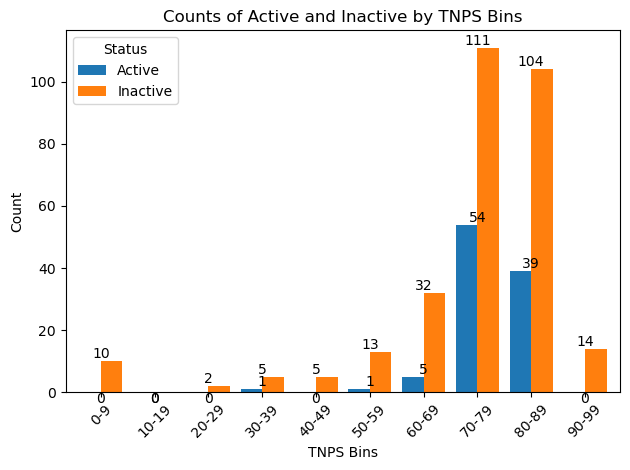

In [44]:
# Define bins for TNPS
bins = np.arange(0, 110, 10)  # Bins from 0 to 100
labels = [f'{i}-{i + 9}' for i in range(0, 100, 10)]

# Cut TNPS into bins
df_merg['TNPS_bin'] = pd.cut(df_merg['TNPS'], bins=bins, labels=labels, right=False)

# Count the occurrences
count_df = df_merg.groupby(['TNPS_bin', 'Status']).size().unstack(fill_value=0)

# Plotting a grouped bar chart
count_df.plot(kind='bar', width=0.8)
plt.title('Counts of Active and Inactive by TNPS Bins')
plt.xlabel('TNPS Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding labels to the bars
for i in range(count_df.shape[0]):
    for j in range(count_df.shape[1]):
        plt.text(i, count_df.values[i][j], count_df.values[i][j], 
                 ha='center', va='bottom' if count_df.values[i][j] > 0 else 'top')

plt.legend(title='Status')
plt.tight_layout()
plt.show()

In [29]:
# Encoding the status column
df_merg['Status'] = df_merg['Status'].apply(lambda x: '1' if x == 'Inactive' else 0)
df_merg['Status']

0      1
1      1
3      1
4      1
7      1
      ..
443    0
444    0
446    0
447    0
448    1
Name: Status, Length: 371, dtype: object

In [30]:
# Checking for unique values in status column
print(df_test2_merg['Status'].unique())

['Active' 'Inactive' 'ZTP']


In [31]:
# Removing unwanted rows
df_test2_merg = df_test2_merg[~df_test2_merg['Status'].isin(['ZTP'])]

In [32]:
# Removing unwanted rows
df_test2_merg = df_test2_merg[~df_test2_merg['Status'].isin(['Moved'])]

In [33]:
# Checking for unique values in status column
print(df_test2_merg['Status'].unique())

['Active' 'Inactive']


In [36]:
df_merg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 448
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BPID                          371 non-null    int64  
 1   Name                          371 non-null    object 
 2   Call Answer                   371 non-null    int64  
 3   Hold Count                    371 non-null    int64  
 4   Disconnected By Agent         371 non-null    int64  
 5   Location                      371 non-null    int64  
 6   Rosterd                       371 non-null    int64  
 7   Tenure                        371 non-null    int64  
 8   Transfer By Agent             371 non-null    int64  
 9   IB: Handled Calls             371 non-null    int64  
 10  OB: Talk Count                371 non-null    int64  
 11  Talk Time Min                 371 non-null    int64  
 12  Hold Time Min                 371 non-null    int64  
 13  Handled Ti

In [34]:
df_merg = df_merg.drop(['Inactive Sub Categorise  ','TNPS%','Name','BPID'], axis = 1)

In [ ]:
#df_merg = df_merg.drop(['TNPS_bin'], axis = 1)

In [35]:
# Converting data type of Status column from object to int
df_merg['Status'] = df_merg['Status'].astype(int)

<Axes: >

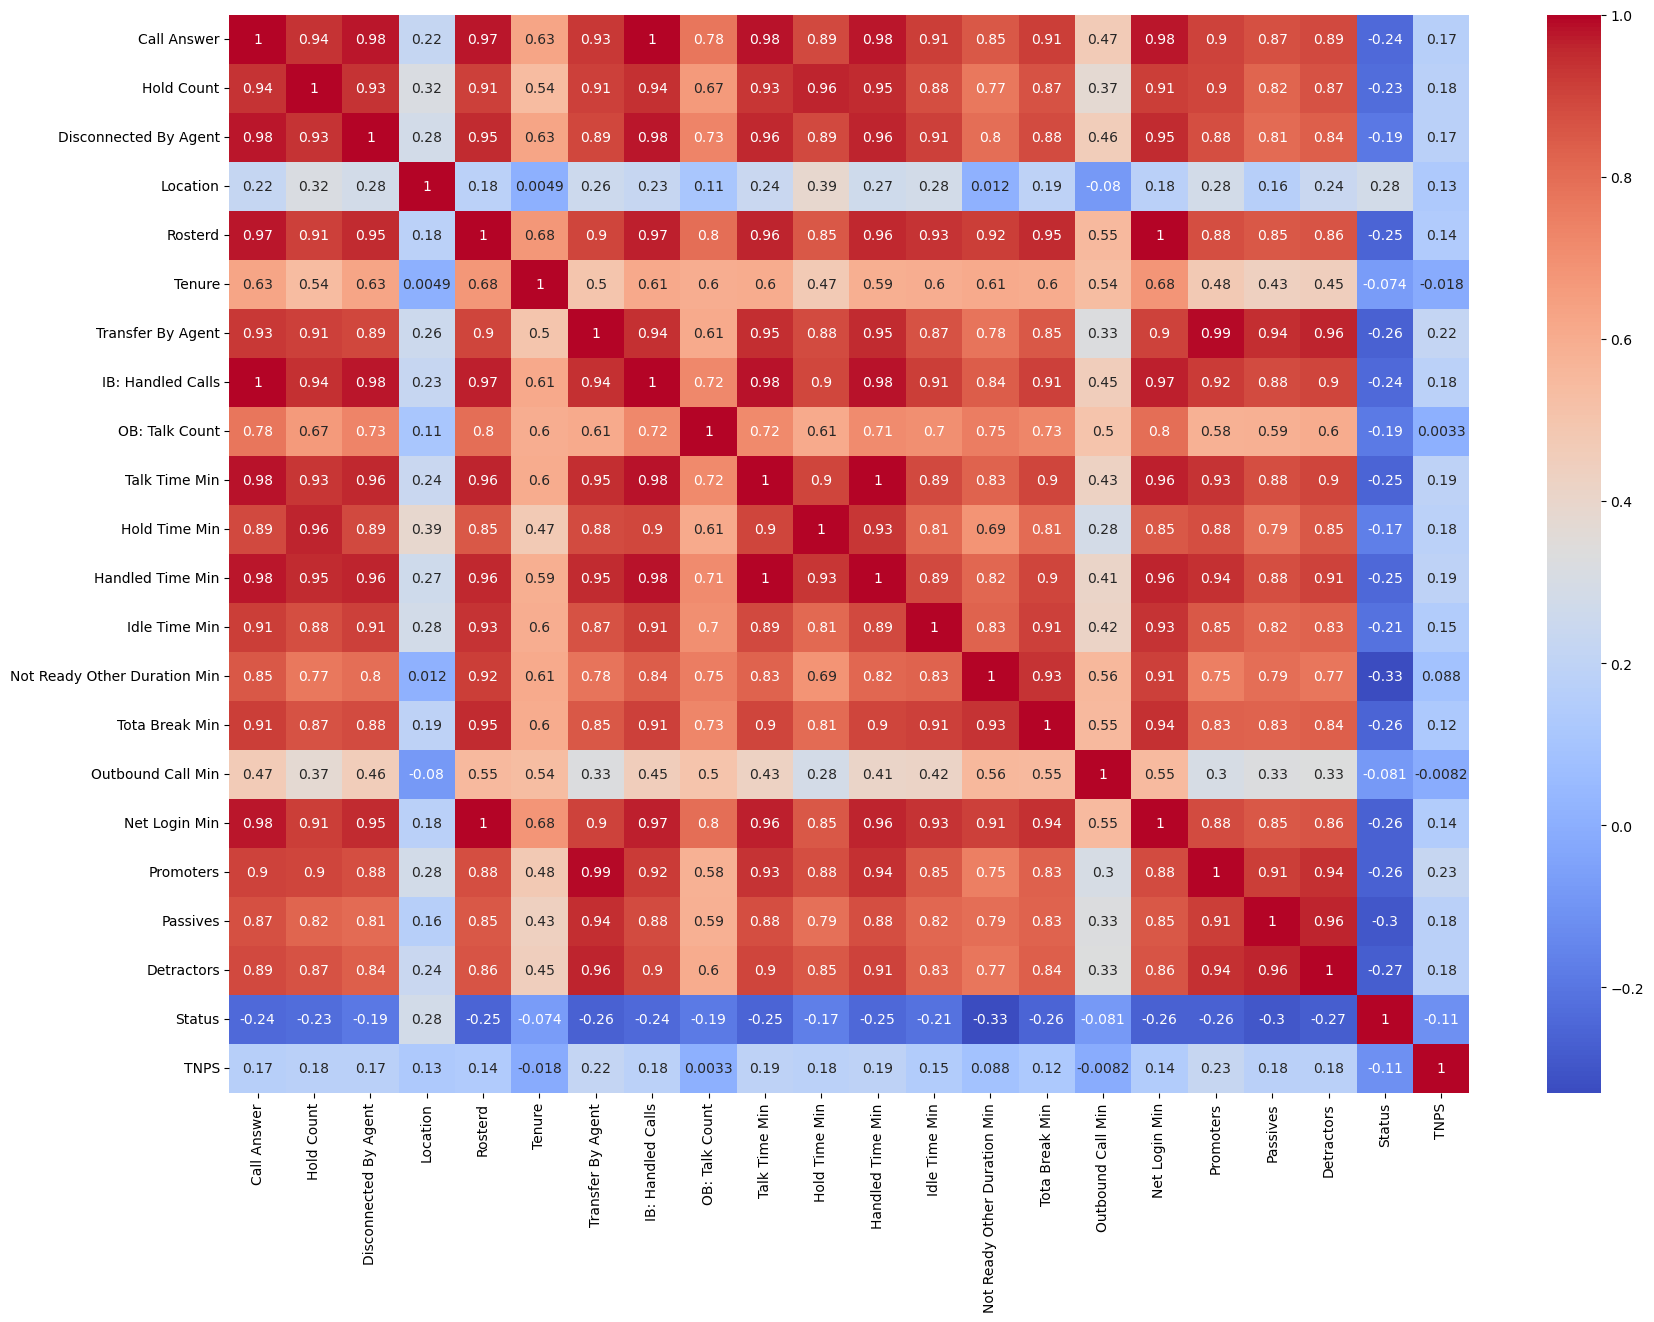

In [177]:
import matplotlib.pyplot as plt
# display correlation matrix in heatmap
corr = df_merg.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [36]:
# Calculate the correlation coefficients between each feature and the target variable
correlation_matrix = df_merg.corr()
correlation_with_Status2 = correlation_matrix['Status'].abs().sort_values(ascending=False)

# Printing sorted correlation values
print(correlation_with_Status2)

Status                          1.000000
Not Ready Other Duration Min    0.329583
Passives                        0.295873
Location                        0.280278
Detractors                      0.272879
Transfer By Agent               0.264096
Promoters                       0.262845
Net Login Min                   0.262666
Tota Break Min                  0.255981
Talk Time Min                   0.254874
Rosterd                         0.254398
Handled Time Min                0.245220
Call Answer                     0.237958
IB: Handled Calls               0.237188
Hold Count                      0.230637
Idle Time Min                   0.211988
Disconnected By Agent           0.192297
OB: Talk Count                  0.185044
Hold Time Min                   0.169817
TNPS                            0.111496
Outbound Call Min               0.081089
Tenure                          0.074469
Name: Status, dtype: float64


In [40]:
df_merg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 448
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Call Answer                   371 non-null    int64
 1   Hold Count                    371 non-null    int64
 2   Disconnected By Agent         371 non-null    int64
 3   Location                      371 non-null    int64
 4   Rosterd                       371 non-null    int64
 5   Tenure                        371 non-null    int64
 6   Transfer By Agent             371 non-null    int64
 7   IB: Handled Calls             371 non-null    int64
 8   OB: Talk Count                371 non-null    int64
 9   Talk Time Min                 371 non-null    int64
 10  Hold Time Min                 371 non-null    int64
 11  Handled Time Min              371 non-null    int64
 12  Idle Time Min                 371 non-null    int64
 13  Not Ready Other Duration Min  371 non-nu

In [37]:
# droping unwanted colum# droping unwanted columns
df_merg = df_merg.drop(['Handled Time Min','Outbound Call Min','OB: Talk Count','Rosterd','Disconnected By Agent','Idle Time Min','IB: Handled Calls'], axis = 1)

In [38]:
df_merg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 448
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Call Answer                   371 non-null    int64
 1   Hold Count                    371 non-null    int64
 2   Location                      371 non-null    int64
 3   Tenure                        371 non-null    int64
 4   Transfer By Agent             371 non-null    int64
 5   Talk Time Min                 371 non-null    int64
 6   Hold Time Min                 371 non-null    int64
 7   Not Ready Other Duration Min  371 non-null    int64
 8   Tota Break Min                371 non-null    int64
 9   Net Login Min                 371 non-null    int64
 10  Promoters                     371 non-null    int64
 11  Passives                      371 non-null    int64
 12  Detractors                    371 non-null    int64
 13  Status                        371 non-nu

In [43]:
# droping unwanted columns
#df_merg2 = df_merg2.drop(['Rosterd','Tenure'], axis = 1)
#df_merg2.info()

NameError: name 'df_merg2' is not defined

In [63]:
import pandas as pd
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
from imblearn.over_sampling import SMOTE
from river import optim

# Split features (X) and target variable (y)
X = df_merg.drop(columns=['Status'])
y = df_merg['Status']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

In [64]:
# Check class distribution
class_counts = df_merg['Status'].value_counts()
print(class_counts)

# Calculate current ratio
majority_count = class_counts.max()
minority_count = class_counts.min()
current_ratio = minority_count / majority_count

print(f'Current Ratio (Minority to Majority): {current_ratio:.2f}')

Status
1    308
0    101
Name: count, dtype: int64
Current Ratio (Minority to Majority): 0.33


In [69]:
import pandas as pd
from river import datasets
from river import metrics
from river import preprocessing
from river import linear_model
from river import ensemble
from river import compose
from imblearn.over_sampling import SMOTE
import numpy as np
from river import optim

# Split features (X) and target variable (y)
X = df_merg.drop(columns=['Status'])
y = df_merg['Status']

# Split data into training and testing sets
train_size = int(len(df_merg) * 0.8)
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]

# Apply SMOTE on the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize the model pipeline
model_rlr2 = compose.Pipeline(
    ('encoder', preprocessing.OneHotEncoder()),
    ('scaler', preprocessing.StandardScaler()),
    ('classifier', linear_model.LogisticRegression(optimizer=optim.SGD(lr=0.2), l1=0.02))
)

# Initialize metrics
accuracy = metrics.Accuracy()
precision = metrics.Precision()
recall = metrics.Recall()
f1 = metrics.F1()

# Online learning loop
for xi, yi in zip(X_resampled.to_dict(orient='records'), y_resampled):
    # Make a prediction
    y_pred = model_rlr2.predict_one(xi)
    
    # Update the metrics
    accuracy.update(yi, y_pred)
    precision.update(yi, y_pred)
    recall.update(yi, y_pred)
    f1.update(yi, y_pred)
    
    # Make the model learn
    model_rlr2.learn_one(xi, yi)

# Print final metrics
print(f"Accuracy: {accuracy.get():.2f}")
print(f"Precision: {precision.get():.2f}")
print(f"Recall: {recall.get():.2f}")
print(f"F1 Score: {f1.get():.2f}")

# Evaluate on the test data
test_accuracy = metrics.Accuracy()
test_precision = metrics.Precision()
test_recall = metrics.Recall()
test_f1 = metrics.F1()

for xi, yi in zip(X_test.to_dict(orient='records'), y_test):
    y_pred = model_rlr2.predict_one(xi)
    
    test_accuracy.update(yi, y_pred)
    test_precision.update(yi, y_pred)
    test_recall.update(yi, y_pred)
    test_f1.update(yi, y_pred)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy.get():.2f}")
print(f"Precision: {test_precision.get():.2f}")
print(f"Recall: {test_recall.get():.2f}")
print(f"F1 Score: {test_f1.get():.2f}")

Accuracy: 0.78
Precision: 0.73
Recall: 0.89
F1 Score: 0.80

Test Metrics:
Accuracy: 0.71
Precision: 0.80
Recall: 0.39
F1 Score: 0.52


In [62]:
df_test_jul = pd.read_excel('C:/Users/int10106/Desktop/Ajio data/River Library Model/July_Test4.xlsx', header = 0)
df_test_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    91 non-null     int64  
 1   BPID                          91 non-null     int64  
 2   Name                          91 non-null     object 
 3   Call Answer                   91 non-null     int64  
 4   Hold Count                    91 non-null     int64  
 5   Disconnected By Agent         91 non-null     int64  
 6   Location                      91 non-null     object 
 7   Rosterd                       91 non-null     int64  
 8   Tenure                        91 non-null     int64  
 9   Transfer By Agent             91 non-null     int64  
 10  IB: Handled Calls             91 non-null     int64  
 11  OB: Talk Count                91 non-null     int64  
 12  Talk Time Min                 91 non-null     int64  
 13  Hold Ti

In [66]:
# Convert to whole numbers
df_test_jul['TNPS'] = (df_test_jul['TNPS%'] * 100).astype(int)
df_test_jul['TNPS']

0     91
1     82
2     84
3     84
4     93
      ..
86    72
87    78
88    73
89    80
90    74
Name: TNPS, Length: 91, dtype: int32

In [70]:
# Selecting specific feature columns

selected_features = ['Call Answer','Hold Count','Location','Tenure','Transfer By Agent',
                     'Talk Time Min','Hold Time Min','Not Ready Other Duration Min',
                     'Tota Break Min','Net Login Min','Promoters','Passives','Detractors','TNPS'] 

X_new_data = df_test_jul[selected_features]

# Apply the same preprocessing steps
X_dict_new_data = X_new_data.to_dict(orient='records')  # Convert to dictionary records

# Make predictions on the new dataset
predictions = []
for X_new_data_row in X_dict_new_data:
    BPID = X_new_data_row.pop('BPID', None)
    y_pred_new_data = model_rlr2.predict_one(X_new_data_row)  # make a prediction
    predictions.append(y_pred_new_data)

# You can now use the 'predictions' list containing the model's predictions for the new dataset
predictions

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False]

In [45]:
import pandas as pd
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing
from imblearn.over_sampling import SMOTE
from river import optim

# Split features (X) and target variable (y)
X = df_merg.drop(columns=['Status'])
y = df_merg['Status']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize accuracy metric
metric = metrics.Accuracy()

# Initialize the logistic regression model
model_rlr = compose.Pipeline(
    preprocessing.OneHotEncoder(),
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression(optimizer=optim.SGD(lr=0.2), l1=0.001)  # Use l2 for Ridge regularization
)

# Training loop for online learning
for xi, yi in zip(X_resampled.to_dict(orient='records'), y_resampled):
    # Make a prediction
    y_pred = model_rlr.predict_one(xi)
    
    # Update the metric
    metric.update(yi, y_pred)
    
    # Make the model learn
    model_rlr.learn_one(xi, yi)

# Print the final accuracy
print(f"Accuracy: {metric.get()}")

Accuracy: 0.8118279569892473


In [87]:
df_merg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409 entries, 0 to 504
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Call Answer                   409 non-null    int64
 1   Hold Count                    409 non-null    int64
 2   Location                      409 non-null    int64
 3   Tenure                        409 non-null    int64
 4   Transfer By Agent             409 non-null    int64
 5   Talk Time Min                 409 non-null    int64
 6   Hold Time Min                 409 non-null    int64
 7   Not Ready Other Duration Min  409 non-null    int64
 8   Tota Break Min                409 non-null    int64
 9   Net Login Min                 409 non-null    int64
 10  Promoters                     409 non-null    int64
 11  Passives                      409 non-null    int64
 12  Detractors                    409 non-null    int64
 13  Status                        409 non-nu

In [51]:
df_test2_merg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BPID                          102 non-null    int64  
 1   Name                          102 non-null    object 
 2   Call Answer                   102 non-null    int64  
 3   Hold Count                    102 non-null    int64  
 4   Disconnected By Agent         102 non-null    int64  
 5   Location                      102 non-null    object 
 6   Rosterd                       102 non-null    int64  
 7   Tenure                        102 non-null    int64  
 8   Transfer By Agent             102 non-null    int64  
 9   IB: Handled Calls             102 non-null    int64  
 10  OB: Talk Count                102 non-null    int64  
 11  Talk Time Min                 102 non-null    int64  
 12  Hold Time Min                 102 non-null    int64  
 13  Handled Ti

In [49]:
# Convert to whole numbers
df_test2_merg['TNPS'] = (df_test2_merg['TNPS%'] * 100).astype(int)
df_test2_merg['TNPS']

0       91
1       82
2       84
3       84
4       93
      ... 
98      92
99     100
100     16
101     44
102     87
Name: TNPS, Length: 102, dtype: int32

In [92]:
df_test2_merg.head()

,BPID,Name,Call Answer,Hold Count,Disconnected By Agent,Location,Rosterd,Tenure,Transfer By Agent,IB: Handled Calls,...,Not Ready Other Duration Min,Tota Break Min,Outbound Call Min,Net Login Min,Promoters,Passives,Detractors,TNPS%,Status,Inactive Sub Categorise
0,680165686,Tiwari Sujit Ramanand,912,532,509,Lucknow,24,756,314,833,...,1784,1241,169,11750,217,15,16,0.845672,Active,NaN
1,680177233,Himesh Jaiswal,664,567,381,Lucknow,24,522,237,614,...,2063,1304,581,11477,147,13,11,0.783614,Active,NaN
5,680179654,Komal Yadav,846,703,508,Lucknow,24,458,238,776,...,2075,1392,258,11662,153,18,7,0.832391,Active,NaN
6,680179670,Kajal Kumari,1274,888,781,Lucknow,27,461,245,1095,...,1856,1435,191,12675,142,12,5,0.896673,Active,NaN
11,680183268,Manish dubey,895,571,531,Lucknow,25,373,246,884,...,2007,1424,160,11397,113,28,9,0.591727,Inactive,Abscond


In [46]:
df_test2_merg.to_excel('July_Test3.xlsx')

In [75]:
df_test_jul = pd.read_excel('C:/Users/int10106/Desktop/Ajio data/River Library Model/July_Test4.xlsx', header = 0)
df_test_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    91 non-null     int64  
 1   BPID                          91 non-null     int64  
 2   Name                          91 non-null     object 
 3   Call Answer                   91 non-null     int64  
 4   Hold Count                    91 non-null     int64  
 5   Disconnected By Agent         91 non-null     int64  
 6   Location                      91 non-null     object 
 7   Rosterd                       91 non-null     int64  
 8   Tenure                        91 non-null     int64  
 9   Transfer By Agent             91 non-null     int64  
 10  IB: Handled Calls             91 non-null     int64  
 11  OB: Talk Count                91 non-null     int64  
 12  Talk Time Min                 91 non-null     int64  
 13  Hold Ti

In [56]:
# Removing unwanted rows
df_test_jul = df_test_jul[~df_test_jul['Status'].isin(['Inactive'])]
df_test_jul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 101
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    91 non-null     int64  
 1   BPID                          91 non-null     int64  
 2   Name                          91 non-null     object 
 3   Call Answer                   91 non-null     int64  
 4   Hold Count                    91 non-null     int64  
 5   Disconnected By Agent         91 non-null     int64  
 6   Location                      91 non-null     object 
 7   Rosterd                       91 non-null     int64  
 8   Tenure                        91 non-null     int64  
 9   Transfer By Agent             91 non-null     int64  
 10  IB: Handled Calls             91 non-null     int64  
 11  OB: Talk Count                91 non-null     int64  
 12  Talk Time Min                 91 non-null     int64  
 13  Hold Time M

In [76]:
# Convert to whole numbers
df_test_jul['TNPS'] = (df_test_jul['TNPS%'] * 100).astype(int)
df_test_jul['TNPS']

0     91
1     82
2     84
3     84
4     93
      ..
86    72
87    78
88    73
89    80
90    74
Name: TNPS, Length: 91, dtype: int32

In [77]:
# Selecting specific feature columns

selected_features = ['Call Answer','Hold Count','Location','Tenure','Transfer By Agent',
                     'Talk Time Min','Hold Time Min','Not Ready Other Duration Min',
                     'Tota Break Min','Net Login Min','Promoters','Passives','Detractors','TNPS'] 

X_new_data = df_test_jul[selected_features]

# Apply the same preprocessing steps
X_dict_new_data = X_new_data.to_dict(orient='records')  # Convert to dictionary records

# Make predictions on the new dataset
predictions = []
for X_new_data_row in X_dict_new_data:
    BPID = X_new_data_row.pop('BPID', None)
    y_pred_new_data = model_rlr.predict_one(X_new_data_row)  # make a prediction
    predictions.append(y_pred_new_data)

# You can now use the 'predictions' list containing the model's predictions for the new dataset
predictions

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]